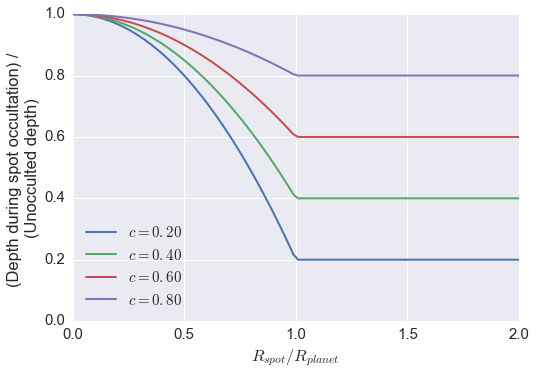

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark', context="notebook", font_scale=1.5)
#sns.set_context()
def spot_occultation_amplitude(R_spot, R_planet, spot_contrast):
    """
    """
    # alpha = unocculted flux minus peak spot occultation flux
    
    depth = R_planet**2
    small_planet = R_planet < R_spot
    small_spot = R_planet >= R_spot

    if not hasattr(R_spot, '__len__'):
        R_spot = np.array([R_spot])
    
    alpha = np.zeros_like(R_spot)
    alpha[small_planet] = spot_contrast
    alpha[small_spot] = 1 - (1 - spot_contrast)*(R_spot[small_spot]/R_planet)**2

    return alpha


R_spot = np.linspace(0, 2*R_planet, 100)
spot_contrasts = [0.2, 0.4, 0.6, 0.8]
R_planet = 0.0583303
kwargs = dict(fontsize=18)

for spot_contrast in spot_contrasts:
    occultation_amplitudes = spot_occultation_amplitude(R_spot, R_planet, spot_contrast)
    plt.plot(R_spot/R_planet, occultation_amplitudes, 
             lw=2, label='$c={0:.2f}$'.format(spot_contrast))

#plt.axhline(spot_contrast, ls='--', color='k', alpha=0.7, label='Spot contrast')

plt.xlabel('$R_{spot}/R_{planet}$')
plt.ylabel('(Depth during spot occultation) / \n(Unspotted depth)')
plt.legend(loc='lower left')
plt.ylim([0, 1])
plt.grid()
plt.show()

In [ ]:
import sys
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as plt
from friedrich.analysis import Transit, Spot, Measurement, MCMCResults
from friedrich.lightcurve import hat11_params_morris
from glob import glob

archive_paths = sorted(glob('/local/tmp/friedrich/hat11/chains???.hdf5'))
#archive_paths = sorted(glob('/local/tmp/friedrich/hat11_init/chains???.hdf5'))
print('load results')
transits = []
all_times = []
for archive_path in archive_paths:
    m = MCMCResults(archive_path, hat11_params_morris())
    all_times.extend(m.lc.times.jd)
    spots = m.get_spots()
    transits.append(Transit(spots))